First let us start with importing all theh necessary libraries:

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from scipy import stats
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



Then load the dataset:

In [26]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
file_path = "/content/drive/My Drive/Code/hotel_bookings.csv"
df = pd.read_csv(file_path)


Display Basic Info:

In [28]:

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [29]:
df.shape

(119390, 32)

As we have got a huge dataset, we will be working on a small sample dataset of 20,000 rows:

In [30]:

df_sample = df.sample(n=20000, random_state=42)

# Display sample information
print(df_sample.info())


<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 30946 to 92398
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           20000 non-null  object 
 1   is_canceled                     20000 non-null  int64  
 2   lead_time                       20000 non-null  int64  
 3   arrival_date_year               20000 non-null  int64  
 4   arrival_date_month              20000 non-null  object 
 5   arrival_date_week_number        20000 non-null  int64  
 6   arrival_date_day_of_month       20000 non-null  int64  
 7   stays_in_weekend_nights         20000 non-null  int64  
 8   stays_in_week_nights            20000 non-null  int64  
 9   adults                          20000 non-null  int64  
 10  children                        20000 non-null  float64
 11  babies                          20000 non-null  int64  
 12  meal                            2

In [31]:
# Print the shape of the sampled dataset
print("Sampled Data Shape:", df_sample.shape)


Sampled Data Shape: (20000, 32)


In [32]:
df_sample.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,17225.000000,1155.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.376900,104.676050,2016.158800,27.140950,15.855900,0.933650,2.503350,1.858000,0.104550,0.007650,0.033000,0.08805,0.154100,0.220650,86.786531,186.619048,2.281300,101.535115,0.060250,0.570550
std,0.484622,106.944533,0.708172,13.642382,8.782812,0.994785,1.899571,0.628694,0.400159,0.107666,0.178641,0.82288,1.570789,0.647445,110.535579,130.274355,17.448965,47.748787,0.239213,0.798533
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000,67.000000,0.000000,68.445000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,14.000000,174.000000,0.000000,94.500000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,229.000000,263.500000,0.000000,125.400000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,9.000000,1.000000,26.00000,63.000000,17.000000,531.000000,525.000000,391.000000,451.500000,3.000000,5.000000


In [33]:

duplicate_count = df_sample.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Total duplicate rows: 3244


In [34]:
df_sample = df_sample.drop_duplicates()


In [35]:
# Check for missing values
print(df_sample.isnull().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              99
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              2350
company                           15731


Let us check missing value by plotting a percentage graph:

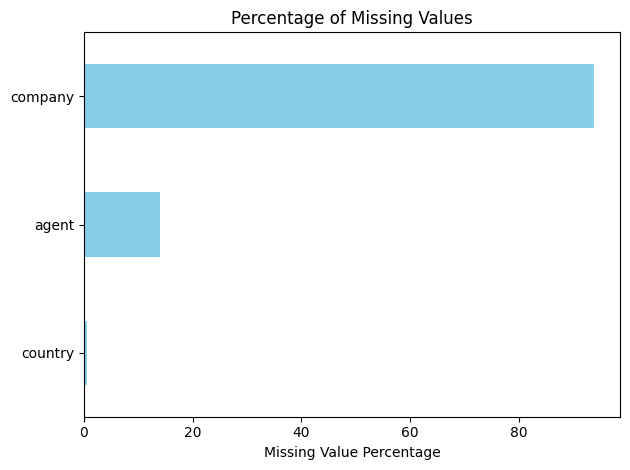

In [36]:

missing_percent = (df_sample[['country', 'agent', 'company']].isnull().mean() * 100)

# Bar plot
missing_percent.plot(kind='barh', color='skyblue')
plt.title("Percentage of Missing Values")
plt.xlabel("Missing Value Percentage")
plt.tight_layout()
plt.show()


We are going to check whether these columns are going to be useful or not:

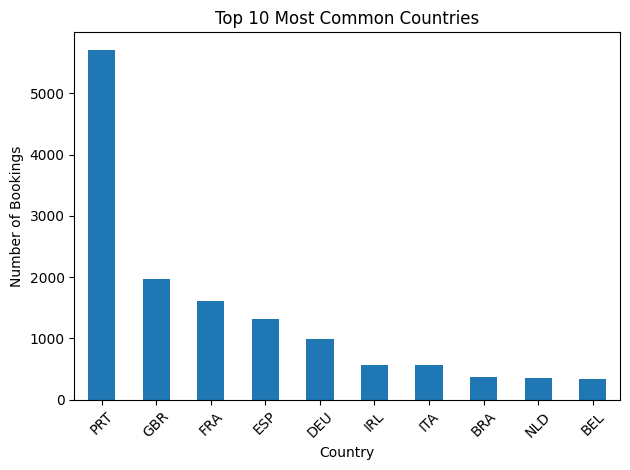

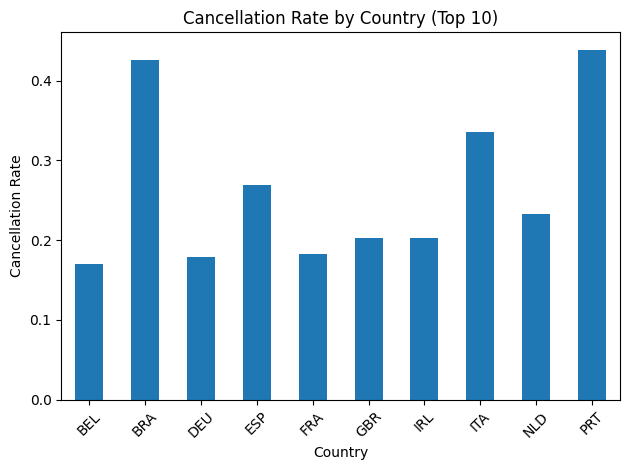

In [37]:
df_sample['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Most Common Countries')
plt.ylabel("Number of Bookings")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


top_countries = df_sample['country'].value_counts().head(10).index
cancel_rate = df_sample[df_sample['country'].isin(top_countries)].groupby('country')['is_canceled'].mean()

cancel_rate.plot(kind='bar', title='Cancellation Rate by Country (Top 10)')
plt.ylabel('Cancellation Rate')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We identified that the agent, company, and country columns does not provide any good insights, so we will drop these columns..

In [38]:
df_sample.drop(columns=['country', 'agent', 'company'], inplace=True)



Let us also check with the other colums are they going to be useful or not:

In [39]:
print(df_sample['meal'].value_counts(normalize=True))


meal
BB           0.772559
HB           0.112974
SC           0.102172
Undefined    0.007520
FB           0.004774
Name: proportion, dtype: float64


Over 77% of reservations had the 'BB' (Bed & Breakfast) option, indicating very little variation, so the meal column was removed. Such a distribution has little effect on the model's capacity to differentiate between canceled and non-canceled reservations, and it provides very little gain.

In [40]:
df_sample['total_guests'] = df_sample['adults'] + df_sample['children'] + df_sample['babies']


In [41]:
df_sample[df_sample['adults'] + df_sample['children'] + df_sample['babies'] == 0].shape


(33, 30)

There are 33 rows with 0 guests (which are likely invalid).Considering above scenerio we will drop these columns:

In [42]:
df_sample.drop(columns=['adults', 'children', 'babies', 'meal'], inplace=True)


In [43]:
#Leakage Column

df_sample.drop(columns=['reservation_status'], inplace=True)


In [44]:
print(df_sample.isnull().sum())


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
total_guests                      0
dtype: int64


In [45]:
df_sample.shape

(16756, 25)

To make dataset more cleaner let us check for the outliers:

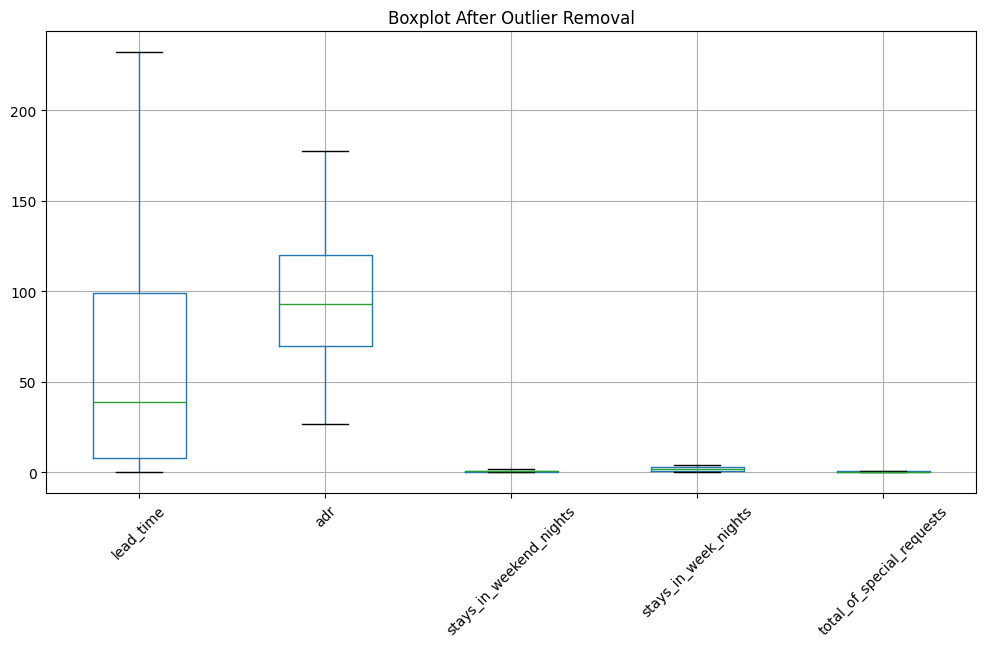

Shape after removing outliers: (9951, 25)


In [46]:
import matplotlib.pyplot as plt

# Updated numerical features
num_features = ['lead_time', 'adr', 'stays_in_weekend_nights',
                'stays_in_week_nights', 'total_of_special_requests']

# Apply stricter IQR filtering (0.75×IQR)
strict_factor = 0.75


for col in num_features:
    Q1 = df_sample[col].quantile(0.25)
    Q3 = df_sample[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - strict_factor * IQR
    upper_bound = Q3 + strict_factor * IQR
    df_sample = df_sample[(df_sample[col] >= lower_bound) & (df_sample[col] <= upper_bound)]

# Plot boxplot after outlier removal
plt.figure(figsize=(12, 6))
df_sample[num_features].boxplot()
plt.title("Boxplot After Outlier Removal")
plt.xticks(rotation=45)
plt.show()

# Show new shape
print("Shape after removing outliers:", df_sample.shape)


Feature Engineer

In [48]:
df_sample.select_dtypes(include='object').columns


Index(['hotel', 'arrival_date_month', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status_date'],
      dtype='object')

In [49]:
# Ensure datetime format
df_sample['reservation_status_date'] = pd.to_datetime(df_sample['reservation_status_date'])

# Extract date parts (can be useful for seasonality, etc.)
df_sample['res_year'] = df_sample['reservation_status_date'].dt.year
df_sample['res_month'] = df_sample['reservation_status_date'].dt.month
df_sample['res_dayofweek'] = df_sample['reservation_status_date'].dt.dayofweek
df_sample['res_weekofyear'] = df_sample['reservation_status_date'].dt.isocalendar().week.astype(int)


In [50]:
def classify_stay_type(row):
    if row['stays_in_weekend_nights'] > row['stays_in_week_nights']:
        return 'Weekend'
    elif row['stays_in_weekend_nights'] < row['stays_in_week_nights']:
        return 'Weekday'
    else:
        return 'Balanced'

# Apply the function
df_sample['stay_type'] = df_sample.apply(classify_stay_type, axis=1)

# Check value counts
print(df_sample['stay_type'].value_counts())


stay_type
Weekday     7152
Weekend     1403
Balanced    1396
Name: count, dtype: int64


In [51]:
print(df_sample.info())


<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 40207 to 92398
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           9951 non-null   object        
 1   is_canceled                     9951 non-null   int64         
 2   lead_time                       9951 non-null   int64         
 3   arrival_date_year               9951 non-null   int64         
 4   arrival_date_month              9951 non-null   object        
 5   arrival_date_week_number        9951 non-null   int64         
 6   arrival_date_day_of_month       9951 non-null   int64         
 7   stays_in_weekend_nights         9951 non-null   int64         
 8   stays_in_week_nights            9951 non-null   int64         
 9   market_segment                  9951 non-null   object        
 10  distribution_channel            9951 non-null   object        
 11  is_r

EDA

<ipython-input-52-487b3956ca15>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df_sample.resample('M', on='reservation_status_date')['is_canceled'].count()


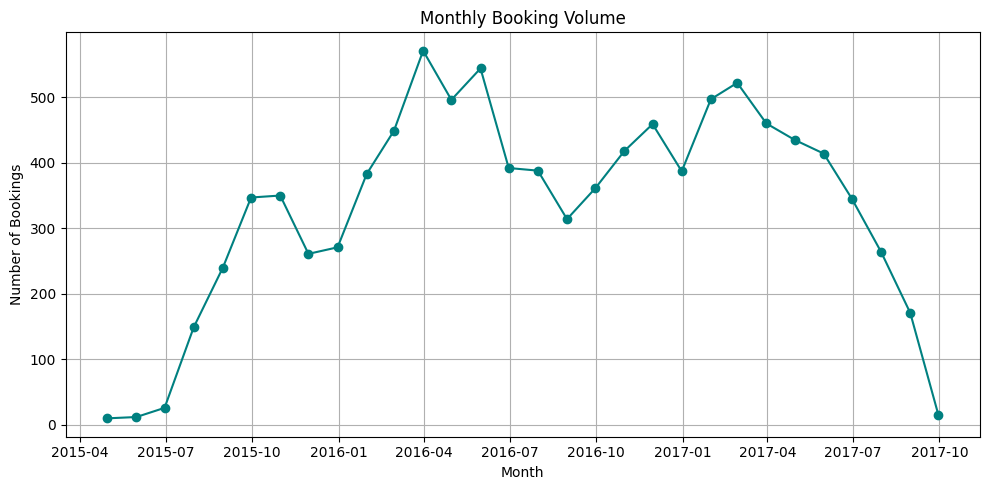

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date column
df_sample['reservation_status_date'] = pd.to_datetime(df_sample['reservation_status_date'])

# Group by month and count bookings
monthly_trend = df_sample.resample('M', on='reservation_status_date')['is_canceled'].count()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='teal')
plt.title("Monthly Booking Volume")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.grid(True)
plt.tight_layout()
plt.show()


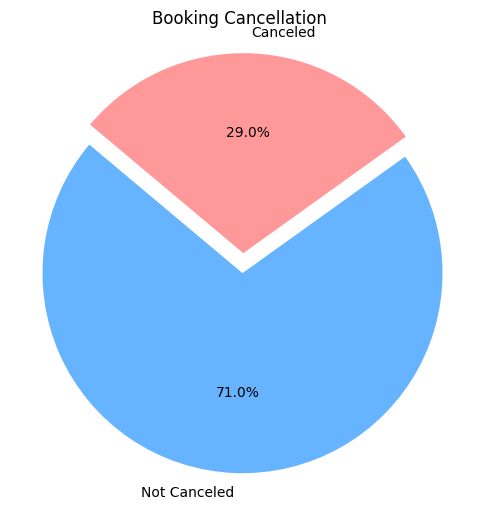

In [53]:
import matplotlib.pyplot as plt

cancel_counts = df_sample['is_canceled'].value_counts()
labels = ['Not Canceled', 'Canceled']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(cancel_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=[0, 0.1])
plt.title('Booking Cancellation ')
plt.axis('equal')
plt.show()


<ipython-input-54-833e080820c2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_segment', y='is_canceled', data=df_sample, palette='Set2', errorbar=None)


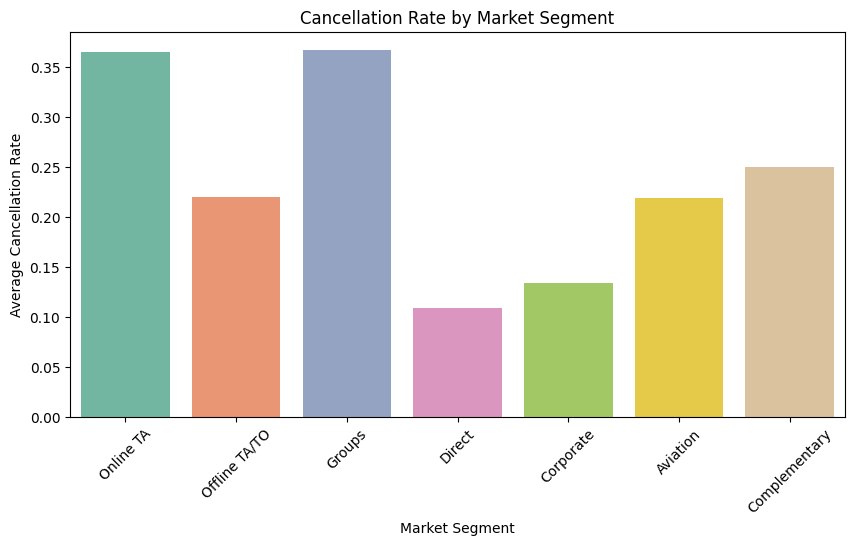

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x='market_segment', y='is_canceled', data=df_sample, palette='Set2', errorbar=None)
plt.xticks(rotation=45)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Cancellation Rate')
plt.show()


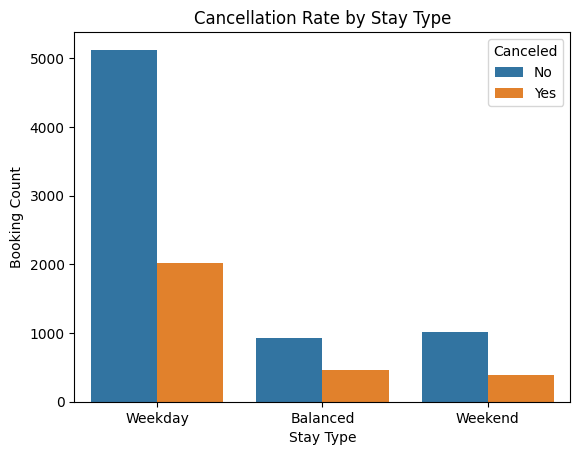

In [55]:
sns.countplot(x='stay_type', hue='is_canceled', data=df_sample)
plt.title("Cancellation Rate by Stay Type")
plt.xlabel("Stay Type")
plt.ylabel("Booking Count")
plt.legend(title="Canceled", labels=["No", "Yes"])
plt.show()


Now we will start with Tain Test Split the dataset

In [56]:
# Define X and y, but EXCLUDE the raw datetime column
X = df_sample.drop(columns=['is_canceled', 'reservation_status_date'])
y = df_sample['is_canceled']


In [57]:
X = pd.get_dummies(X, drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)




In [58]:
# Check the shape of train and test sets
train_size = len(X_train)
test_size = len(X_test)
total = train_size + test_size

# Display proportions
print(f"Train set size: {train_size} ({(train_size/total)*100:.2f}%)")
print(f"Test set size: {test_size} ({(test_size/total)*100:.2f}%)")
print(f"Total samples: {total}")


Train set size: 7960 (79.99%)
Test set size: 1991 (20.01%)
Total samples: 9951


In [59]:
# Check class distribution in training and test sets
print("Class Distribution in Training Set:")
print(y_train.value_counts(normalize=True).round(3))

print("\n Class Distribution in Test Set:")
print(y_test.value_counts(normalize=True).round(3))


Class Distribution in Training Set:
is_canceled
0    0.71
1    0.29
Name: proportion, dtype: float64

 Class Distribution in Test Set:
is_canceled
0    0.71
1    0.29
Name: proportion, dtype: float64


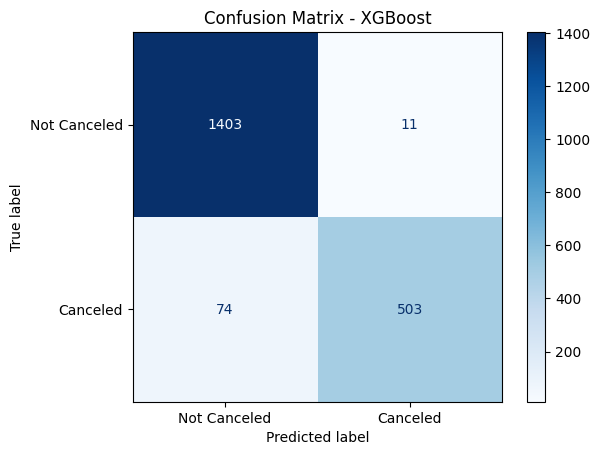

In [61]:
# Train XGBoost model
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Canceled", "Canceled"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()

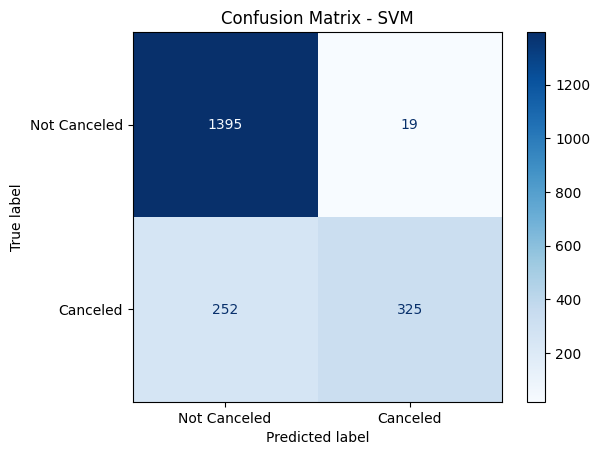

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create an SVM pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC(random_state=42))

# Now you can use svm_pipeline.fit()
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Not Canceled", "Canceled"])
disp_svm.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


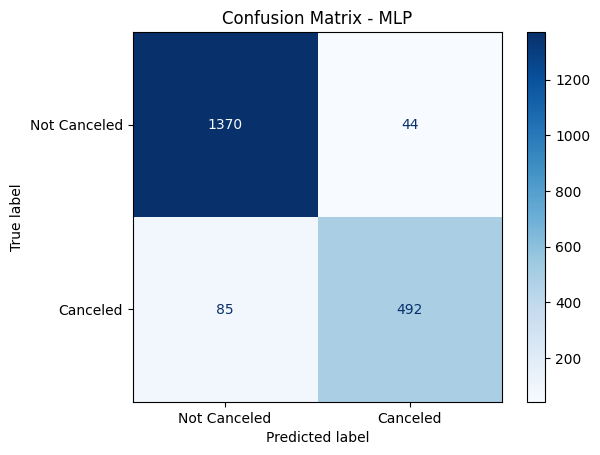

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Create an MLP pipeline
mlp_pipeline = make_pipeline(StandardScaler(), MLPClassifier(random_state=42)) # Define the mlp_pipeline variable

#Train MLP model
mlp_pipeline.fit(X_train, y_train)
y_pred_mlp = mlp_pipeline.predict(X_test)

# Confusion Matrix for MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=["Not Canceled", "Canceled"])
disp_mlp.plot(cmap='Blues')
plt.title("Confusion Matrix - MLP")
plt.show()

In [67]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Accuracy & Classification Report
print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:48:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}

 Accuracy: 0.9608
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1414
           1       0.99      0.88      0.93       577

    accuracy                           0.96      1991
   macro avg       0.97      0.94      0.95      1991
weighted avg       0.96      0.96      0.96      1991



In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define MLP parameter grid
mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200]
}

mlp = MLPClassifier(random_state=42)

# Grid search
mlp_grid = GridSearchCV(mlp, mlp_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
mlp_grid.fit(X_train, y_train)

# Results
print("Best Parameters (MLP):", mlp_grid.best_params_)

best_mlp = mlp_grid.best_estimator_
mlp_pred = best_mlp.predict(X_test)

print(f"\n Accuracy (MLP): {accuracy_score(y_test, mlp_pred):.4f}")
print("Classification Report (MLP):")
print(classification_report(y_test, mlp_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters (MLP): {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}

 Accuracy (MLP): 0.7916
Classification Report (MLP):
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1414
           1       0.76      0.41      0.53       577

    accuracy                           0.79      1991
   macro avg       0.78      0.68      0.70      1991
weighted avg       0.79      0.79      0.77      1991



In [69]:
from sklearn.svm import SVC

# Define SVM parameter grid
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

svm = SVC(probability=True)

# Grid search
svm_grid = GridSearchCV(svm, svm_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Results
print("Best Parameters (SVM):", svm_grid.best_params_)

best_svm = svm_grid.best_estimator_
svm_pred = best_svm.predict(X_test)

print(f"\n Accuracy (SVM): {accuracy_score(y_test, svm_pred):.4f}")
print("Classification Report (SVM):")
print(classification_report(y_test, svm_pred))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters (SVM): {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

 Accuracy (SVM): 0.8232
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1414
           1       0.87      0.46      0.60       577

    accuracy                           0.82      1991
   macro avg       0.84      0.72      0.74      1991
weighted avg       0.83      0.82      0.80      1991



In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Grid search
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid,
                       scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
rf_grid.fit(X_train, y_train)

# Best model
print("Best Parameters (Random Forest):", rf_grid.best_params_)

best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test)

# Evaluation
print(f"\n Accuracy (Random Forest): {accuracy_score(y_test, rf_pred):.4f}")
print("Classification Report (Random Forest):")
print(classification_report(y_test, rf_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters (Random Forest): {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

 Accuracy (Random Forest): 0.8950
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1414
           1       0.91      0.71      0.80       577

    accuracy                           0.90      1991
   macro avg       0.90      0.84      0.86      1991
weighted avg       0.90      0.90      0.89      1991

